# Class 22: Reinforcement of strings with regex and NLTK

We are going to discuss two other approaches to dealing with string and text data. We're going to use the [Natural Language Toolkit](http://www.nltk.org) library, but we first have to download some data corpora and libraries to use NLTK. Running this block of code *should* pop up a new window with four blue tabs: Collections, Corpora, Models, All Packages. Under Collections, Select the entry with "book" in the Identifier column and select download. Once the status "Finished downloading collection 'book'." prints in the grey bar at the bottom, you can close this pop-up.

![](http://www.nltk.org/images/nltk-downloader.png)

## NLTK

In [ ]:
import nltk
nltk.download()

You should only need to do the download step once. In the future, you can start from the cell below.

In [2]:
from collections import Counter
import nltk
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from nltk.book import text1, text2, text3, text4, text5, text6, text7, text8, text9
text_list = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


We can also download text from the web and load it into a NLTK Text object. Let's get something from [Project Gutenberg's Top 100 list](https://www.gutenberg.org/browse/scores/top).

How long is each body of text? We can use `len` on a `Text` object.

In [4]:
for t in text_list:
    print("{0} has {1:,} words\n".format(t,len(t)))

<Text: Moby Dick by Herman Melville 1851> has 260,819 words

<Text: Sense and Sensibility by Jane Austen 1811> has 141,576 words

<Text: The Book of Genesis> has 44,764 words

<Text: Inaugural Address Corpus> has 145,735 words

<Text: Chat Corpus> has 45,010 words

<Text: Monty Python and the Holy Grail> has 16,967 words

<Text: Wall Street Journal> has 100,676 words

<Text: Personals Corpus> has 4,867 words

<Text: The Man Who Was Thursday by G . K . Chesterton 1908> has 69,213 words



How many unique words in each text document? We can call `set` on a Text object.

In [5]:
for t in text_list:
    print("{0} has {1:,} unique words\n".format(t,len(set(t))))

<Text: Moby Dick by Herman Melville 1851> has 19,317 unique words

<Text: Sense and Sensibility by Jane Austen 1811> has 6,833 unique words

<Text: The Book of Genesis> has 2,789 unique words

<Text: Inaugural Address Corpus> has 9,754 unique words

<Text: Chat Corpus> has 6,066 unique words

<Text: Monty Python and the Holy Grail> has 2,166 unique words

<Text: Wall Street Journal> has 12,408 unique words

<Text: Personals Corpus> has 1,108 unique words

<Text: The Man Who Was Thursday by G . K . Chesterton 1908> has 6,807 unique words



We can define a function that measures the [lexical diversity](https://en.wikipedia.org/wiki/Lexical_diversity) of the text by computing the number of unique words as a percentage of the total number of words. If each word was used only once, then the richness would be 100% but if the same word was repeated the entire length of the document, then the richness would be 0%.

In [6]:
def lexical_diversity(text):
    return len(set(text))/len(text)

for t in text_list:
    print("{0} has a lexical diversity of {1:.2}\n".format(t,lexical_diversity(t)))

<Text: Moby Dick by Herman Melville 1851> has a lexical diversity of 0.074

<Text: Sense and Sensibility by Jane Austen 1811> has a lexical diversity of 0.048

<Text: The Book of Genesis> has a lexical diversity of 0.062

<Text: Inaugural Address Corpus> has a lexical diversity of 0.067

<Text: Chat Corpus> has a lexical diversity of 0.13

<Text: Monty Python and the Holy Grail> has a lexical diversity of 0.13

<Text: Wall Street Journal> has a lexical diversity of 0.12

<Text: Personals Corpus> has a lexical diversity of 0.23

<Text: The Man Who Was Thursday by G . K . Chesterton 1908> has a lexical diversity of 0.098



What are the longest words in the text?

In [7]:
def find_longest_word(text):
    longest = ''
    for word in set(text):
        if len(word) > len(longest):
            longest = word
    return longest

for t in text_list:
    print("The longest word in {0} is: {1}\n".format(t,find_longest_word(t)))

The longest word in <Text: Moby Dick by Herman Melville 1851> is: uninterpenetratingly

The longest word in <Text: Sense and Sensibility by Jane Austen 1811> is: companionableness

The longest word in <Text: The Book of Genesis> is: Zaphnathpaaneah

The longest word in <Text: Inaugural Address Corpus> is: antiphilosophists

The longest word in <Text: Chat Corpus> is: //www.wunderground.com/cgi-bin/findweather/getForecast?query=95953#FIR

The longest word in <Text: Monty Python and the Holy Grail> is: understanding

The longest word in <Text: Wall Street Journal> is: marketing-communications

The longest word in <Text: Personals Corpus> is: DISCIPLINARIAN

The longest word in <Text: The Man Who Was Thursday by G . K . Chesterton 1908> is: undenominational



We can also measure the frequency distribution of how often a word is used in a corpus.

In [57]:
_t = text1
fdist_text1 = nltk.FreqDist(_t)
fdist_text1.most_common(25)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280)]

We can also plot the distribution of how often words occur in the corpus. We get an interesting pattern called the [Zipf distribution](https://en.wikipedia.org/wiki/Zipf%27s_law). There are many words that occur only once (upper left) and single words that occur thousands of times (lower right) but the pattern follows a consistent log-linear pattern.

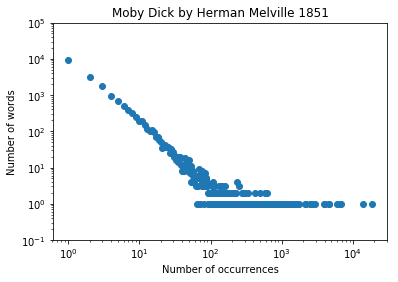

In [58]:
counter_text1 = Counter(fdist_text1.values())

f,ax = plt.subplots(1,1)
ax.scatter(list(counter_text1.keys()),list(counter_text1.values()))
ax.set_ylim((1e-1,1e5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(_t.name)
ax.set_xlabel('Number of occurrences')
ax.set_ylabel('Number of words')

## Normalizing text

An important part of processing natural language data is normalizing this data by removing variations in the text that the computer naively thinks are different entities but humans recognize as being the same. There are several steps to this including case adjustment and stemming/lemmatization.

In the case of case adjustment, it turns out several of the different "words" in the corpus are actually the same, but because they have different capitalizations, they're counted as different unique words. Explore how many five-letter words are the same, just with different capitalizations.

In [ ]:
five_letter_words = list()

for w in set(text1):
    if len(w) == 5:
        five_letter_words.append(w)

In [15]:
five_letter_words = [w for w in set(text1) if len(w) == 5]

print("There are {0:,} five-letter words in the corpus.".format(len(five_letter_words)))

There are 2,397 five-letter words in the corpus.


In [16]:
mixed_case_tokens = []

for word1 in five_letter_words:
    for word2 in five_letter_words:
        if word1.lower() == word2.lower() and word1 != word2:
            mixed_case_tokens.append((word1,word2))

print("There are {0:,} five-letter words in the corpus that are the same but have different cases.".format(len(mixed_case_tokens)))
mixed_case_tokens[:10]

There are 924 five-letter words in the corpus that are the same but have different cases.


[('being', 'Being'),
 ('being', 'BEING'),
 ('LYING', 'lying'),
 ('LYING', 'Lying'),
 ('fifth', 'Fifth'),
 ('young', 'Young'),
 ('CEASE', 'cease'),
 ('OATHS', 'oaths'),
 ('speak', 'Speak'),
 ('Doesn', 'doesn')]

In [17]:
text1_lowered = [i.lower() for i in text1.tokens]
print("There are {0:,} unique words in text1 before lowering and {1:,} after lowering".format(len(set(text1)),len(set(text1_lowered))))

There are 19,317 unique words in text1 before lowering and 17,231 after lowering


Another problem with natural language text is plural (dogs vs. dog) and possessive (dog's vs. dog) forms, verb conjugations (walk, walks, walked, walking), and contractions (they're) are also counted as unique words even if the underlying concepts are similar. Extracting [word stems](https://en.wikipedia.org/wiki/Word_stem) means removing prefixes and affixes that result in a new token, but not a significantly new meaning.

We can use a variety of [stemming](https://en.wikipedia.org/wiki/Stemming) and [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) tools in NLTK to try to recover unique words stripped of any prefixes or suffixes.

In [18]:
porter = nltk.PorterStemmer()

[porter.stem(t.lower()) for t in text1.tokens[10:50] if len(t) > 2]

['suppli',
 'late',
 'consumpt',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbar',
 'coat',
 'heart',
 'bodi',
 'and',
 'brain',
 'see',
 'him',
 'now',
 'wa',
 'ever',
 'dust',
 'hi',
 'old',
 'lexicon',
 'and']

After stemming the words in `text1`, how many unique words remain? 

Nearly half of the words in *Moby Dick* that were initially counted as unique were actually duplicates of other words!

In [19]:
text1_lowered_stemmed = set()

for t in set(text1):
    t_lower = t.lower()
    t_stemmed = porter.stem(t_lower)
    text1_lowered_stemmed.add(t_stemmed)
    
print("There are {0:,} unique words in text1 before and {1:,} after lowering and stemming".format(len(set(text1)),len(set(text1_lowered_stemmed))))

There are 19,317 unique words in text1 before and 10,927 after lowering and stemming


Lemmatization is a bit smarter about removing letters: it checks if the word is a plural, conjugation, etc. of another word and them "stems" it down to the root word only if in the dictionary. These lookups are expensive in comparision to basically slicing characters off a list like stemming, but results in better quality — but far from perfect — results. For example, "supplied" should have been reduced to "supply" and "dusting" and "dust".

In [21]:
wnl = nltk.WordNetLemmatizer()

[wnl.lemmatize(t.lower()) for t in text1.tokens[10:50] if len(t) > 2]

['supplied',
 'late',
 'consumptive',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'and',
 'brain',
 'see',
 'him',
 'now',
 'wa',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicon',
 'and']

After lemmatizing the words in `text1`, how many unique words remain? Lemmatizing isn't as aggressive as stemming, but there's still a 25% reduction in the total number of unique words!

In [23]:
text1_lowered_lemmatized = set()

for t in set(text1):
    t_lower = t.lower()
    t_lemmatized = wnl.lemmatize(t_lower)
    text1_lowered_lemmatized.add(t_lemmatized)
    
print("There are {0:,} unique words in text1 before and {1:,} after lowering and stemming".format(len(set(text1)),len(set(text1_lowered_lemmatized))))


There are 19,317 unique words in text1 before and 15,168 after lowering and stemming


## Regular expressions

In [24]:
import re
from bs4 import BeautifulSoup

In [26]:
# We have to pretend to be a web browser in order for it to actually give us data
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

# Congress webmasters actually have nicely parsed member data into XML for you
senate_raw = requests.get('https://www.senate.gov/general/contact_information/senators_cfm.xml',headers=headers).text
house_raw = requests.get('http://clerk.house.gov/xml/lists/MemberData.xml',headers=headers).text

senate_soup = BeautifulSoup(senate_raw,'lxml')
house_soup = BeautifulSoup(house_raw,'lxml')

Compare the data that the House and the Senator provide about their respective members. The House office fields break out the building, room, ZIP code, etc. of the address while the Senate just has the full string as an address.

In [27]:
house_dict = [{i.name:i.text for i in list(member.children) if i != '\n'} for member in house_soup.find_all('member-info')]
house_dict[0]

{'bioguideid': 'Y000033',
 'caucus': 'R',
 'courtesy': 'Mr.',
 'district': 'At Large',
 'elected-date': 'November  8, 2016',
 'firstname': 'Don',
 'formal-name': 'Mr. Young of Alaska',
 'lastname': 'Young',
 'middlename': '',
 'namelist': 'Young, Don',
 'office-building': 'RHOB',
 'office-room': '2314',
 'office-zip': '20515',
 'office-zip-suffix': '0200',
 'official-name': 'Don Young',
 'party': 'R',
 'phone': '(202) 225-5765',
 'prior-congress': '114',
 'sort-name': 'YOUNG,DON',
 'state': 'Alaska',
 'suffix': '',
 'sworn-date': 'January  3, 2017',
 'townname': 'Fort Yukon'}

In [31]:
senator_dict = [{i.name:i.text for i in list(member.children) if i != '\n'} for member in list(senate_soup.find_all('member'))]
senator_dict[0]

{'address': '455 Dirksen Senate Office Building Washington DC 20510',
 'bioguide_id': 'A000360',
 'class': 'Class II',
 'email': 'http://www.alexander.senate.gov/public/index.cfm?p=Email',
 'first_name': 'Lamar',
 'last_name': 'Alexander',
 'member_full': 'Alexander (R-TN)',
 'party': 'R',
 'phone': '(202) 224-4944',
 'state': 'TN',
 'website': 'http://www.alexander.senate.gov/'}

How could we parse out the building, room, and ZIP code from the Senate office fields? We could use regular expressions!

In [32]:
example_address = senator_dict[0]['address']
example_address

'455 Dirksen Senate Office Building Washington DC 20510'

There's a lot of really advanced and specialized terminology around writing regular expressions. The [documentation](https://docs.python.org/3/library/re.html) can be arcane to read, but there are some basic symbols we can play with.

| Symbol | Function |
| --- | --- | 
| \b | Word boundary (zero width) |
| \d | Any decimal digit (equivalent to [0-9]) |
| \D | Any non-digit character (equivalent to [^0-9]) |
| \s | Any whitespace character (equivalent to [ \t\n\r\f\v]) |
| \S | Any non-whitespace character (equivalent to [^ \t\n\r\f\v]) |
| \w | Any alphanumeric character (equivalent to [a-zA-Z0-9\_]) |
| \W | Any non-alphanumeric character (equivalent to [^a-zA-Z0-9\_]) |
| \t | The tab character |
| \n | The newline character |

Using the `\d+` expression, we can get all the repeated digits in the string. This captures both the office number and the ZIP code.

In [33]:
re.findall(r'\d+',example_address)

['455', '20510']

We could try to capture exactly three digits with the `\d{3}` expression, but this still captures part of the zip code.

In [34]:
re.findall(r'\d{3}',example_address)

['455', '205']

We could use word boundaries `\b` in the expression to capture where words end, but this captures the last three digits of the ZIP code now.

In [35]:
re.findall(r'\d{3}\b',example_address)

['455', '510']

We can use word boundaries at the beginning and end.

In [36]:
re.findall(r'\b\d{3}\b',example_address)

['455']

We can do the same for the ZIP code now.

In [37]:
re.findall(r'\b\d{5}\b',example_address)

['20510']

We can match more complex strings too. the `\w+` syntax will match any unicode word character and combined with the "Senate Office Building will get us the full office building.

In [38]:
re.findall(r'\b\w+\b Senate Office Building',example_address)

['Dirksen Senate Office Building']

Parentheses will match whatever is inside. So we can match the whole string but only return the name of the office building.

In [39]:
re.findall(r'(\b\w+\b) Senate Office Building',example_address)

['Dirksen']

Compare this to just matching all the words with a word end or beginning picks up all the phrases.

In [40]:
re.findall(r'(\b\w+\b)',example_address)

['455', 'Dirksen', 'Senate', 'Office', 'Building', 'Washington', 'DC', '20510']

Let's pretend there wasn't a "party" field but the only party information we had was inside the "member_full" field.

In [41]:
example_member_full = senator_dict[0]['member_full']
example_member_full

'Alexander (R-TN)'

We can match any character with the `.` dot and catch all of them with the `+`. However, we want the content inside the parentheses but we know from above that the parentheses inside a regex have special functions. So we can *escape* the parentheses with a forward slash so that the pattern actually tries to match parentheses in the string itself.

In [44]:
re.findall(r'\(.+\)',example_member_full)[0]

'(R-TN)'

In [45]:
re.findall(r'\(R-TN\)',example_member_full)[0]

'(R-TN)'

In [46]:
re.findall(r'\(\w-\w{2}\)',example_member_full)[0] # Now matches R and any "-XX" where x are any word characters

'(R-TN)'

Again assuming that every senator is a Democrat, Republican, or Independent, we can also try to match combinations of regular expressions. For instance, we can match the D, R, or I joined by the pipes.

In [47]:
re.findall(r'\(D|R|I-\w{2}\)',example_member_full)[0]

'R'

Now imagine we wanted to catch the state instead. The pipe notation we used above is "greedy" in the sense that once they match, it stops looking so we never get to return the state abbreviate we indended it should return inside the parentheses.

In [48]:
re.findall(r'\(D|R|I-(\w{2})\)',example_member_full)[0]

''

One solution is to put the `D|R|I` inside parentheses so that both matches are treated equally and will return even if they're for different purposes.

In [49]:
re.findall(r'\((D|R|I)-(\w{2})\)',example_member_full)[0]

('R', 'TN')

Back up a step and swap out the `D|R|I` and just match any one-character party identification.

In [50]:
re.findall(r'\(\w-(\w{2})\)',example_member_full)[0]

'TN'

Let's combine all of these.

In [51]:
for senator in senator_dict:
    office_room = re.findall(r'\b\d{3}\b',senator['address'])[0]
    office_zip = re.findall(r'\b\d{5}\b',senator['address'])[0]
    office_building = re.findall(r'(\b\w+\b) Senate Office Building',senator['address'])[0]
    party = re.findall(r'\((R|D|I)-\w{2}\)',senator['member_full'])[0]
    state = re.findall(r'\(\w-(\w{2})\)',example_member_full)[0]
    print('{0} {1} ({2}) represents {3}: Office room is {4}, building is {5}, and ZIP is {6}'.format(senator['first_name'],senator['last_name'],party,state,office_room,office_building,office_zip))

Lamar Alexander (R) represents TN: Office room is 455, building is Dirksen, and ZIP is 20510


IndexError: list index out of range

It turns out Tammy Baldwin doesn't have a "Senate Office Building" in her address. An inconsistency in the raw data! Oh well, such is the data life.

In [52]:
exception_address = senator_dict[1]['address']
exception_address

'709 Hart Washington DC 20510'

We could try to code for these kinds of exceptions.

In [53]:
re.findall(r'\d+ (\w+|\w+ Senate Office Building).+Washington',exception_address)

['Hart']

Make sure it still matches the initial `example_address` test case.

In [54]:
re.findall(r'\d+ (\w+|\w+ Senate Office Building).+Washington',example_address)

['Dirksen']

We should skip her for now then. It looks like there are still a few more inconsistencies in the data, but we're still getting most of it.

In [80]:
for senator in senator_dict:
    try:
        office_room = re.findall(r'\b\w{3,4}\b',senator['address'])[0]
        office_zip = re.findall(r'\b\d{5}\b',senator['address'])[0]
        office_building = re.findall(r'\d+ (\w+|\w+ Senate Office Building).+Washington',senator['address'])[0]
        party = re.findall(r'\((R|D|I)-\w{2}\)',senator['member_full'])[0]
        state = re.findall(r'\(\w-(\w{2})\)',senator['member_full'])[0]
        print('{0} {1} ({2}) represents {3}: Office room is {4}, building is {5}, and ZIP is {6}'.format(senator['first_name'],senator['last_name'],party,state,office_room,office_building,office_zip))
    except IndexError:
        print('{0} {1} had an error'.format(senator['first_name'],senator['last_name']))

Lamar Alexander (R) represents TN: Office room is 455, building is Dirksen, and ZIP is 20510
Tammy Baldwin (D) represents WI: Office room is 709, building is Hart, and ZIP is 20510
John Barrasso (R) represents WY: Office room is 307, building is Dirksen, and ZIP is 20510
Michael F. Bennet (D) represents CO: Office room is 261, building is Russell, and ZIP is 20510
Richard Blumenthal (D) represents CT: Office room is 706, building is Hart, and ZIP is 20510
Roy Blunt (R) represents MO: Office room is 260, building is Russell, and ZIP is 20510
Cory A. Booker (D) represents NJ: Office room is 359, building is Dirksen, and ZIP is 20510
John Boozman (R) represents AR: Office room is 141, building is Hart, and ZIP is 20510
Sherrod Brown (D) represents OH: Office room is 713, building is Hart, and ZIP is 20510
Richard Burr (R) represents NC: Office room is 217, building is Russell, and ZIP is 20510
Maria Cantwell (D) represents WA: Office room is 511, building is Hart, and ZIP is 20510
Shelley